In [70]:
import transformers
from transformers import CLIPTokenizer, CLIPTextModel, CLIPProcessor, CLIPModel
transformers.logging.set_verbosity_error()


In [71]:
tokenizer = CLIPTokenizer.from_pretrained(
    "openai/clip-vit-large-patch14",
    cache_dir="data/models/openai/clip-vit-large-patch14",
    local_files_only=True,
)
text_model = CLIPTextModel.from_pretrained(
    "openai/clip-vit-large-patch14", 
    cache_dir="data/models/openai/clip-vit-large-patch14",
    local_files_only=True,
)
# model = CLIPModel.from_pretrained(
#     "openai/clip-vit-large-patch14",
#     cache_dir="data/models/openai/clip-vit-large-patch14",
#     local_files_only=True,
# )


In [84]:
def embed(text):
    input_ids = tokenizer(text, return_tensors="pt").input_ids
    tensor = text_model(input_ids).pooler_output
    return tensor.squeeze().detach().numpy()

In [167]:
objects = ["horse", "cow", "elephant", "giraffe", "zebra", "lion", "tiger", "bear", "monkey", "wolf", "fox", "sheep", "goat", "pig", "mouse", "rat", "rabbit"] 
# objects = ["cat", "dog", "cow"]
modifiers = ["", "high resolution", "ultra-high resolution"]

embeddings = {}
for mod in modifiers:
    embeddings[mod] = {}
    for obj in objects:
        emb = embed(f"a {mod} photo of a {obj}")
        embeddings[mod][obj] = emb

In [168]:
from sklearn.manifold import TSNE
import numpy as np

tsne = TSNE(n_components=2, init='pca', perplexity=30, learning_rate='auto')
v = np.vstack([*embeddings[""].values(), *embeddings["high resolution"].values()])
result = tsne.fit_transform(v)

/Users/szhong/SDKs/anaconda3-arm64/envs/invokeai/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


(38, 768)

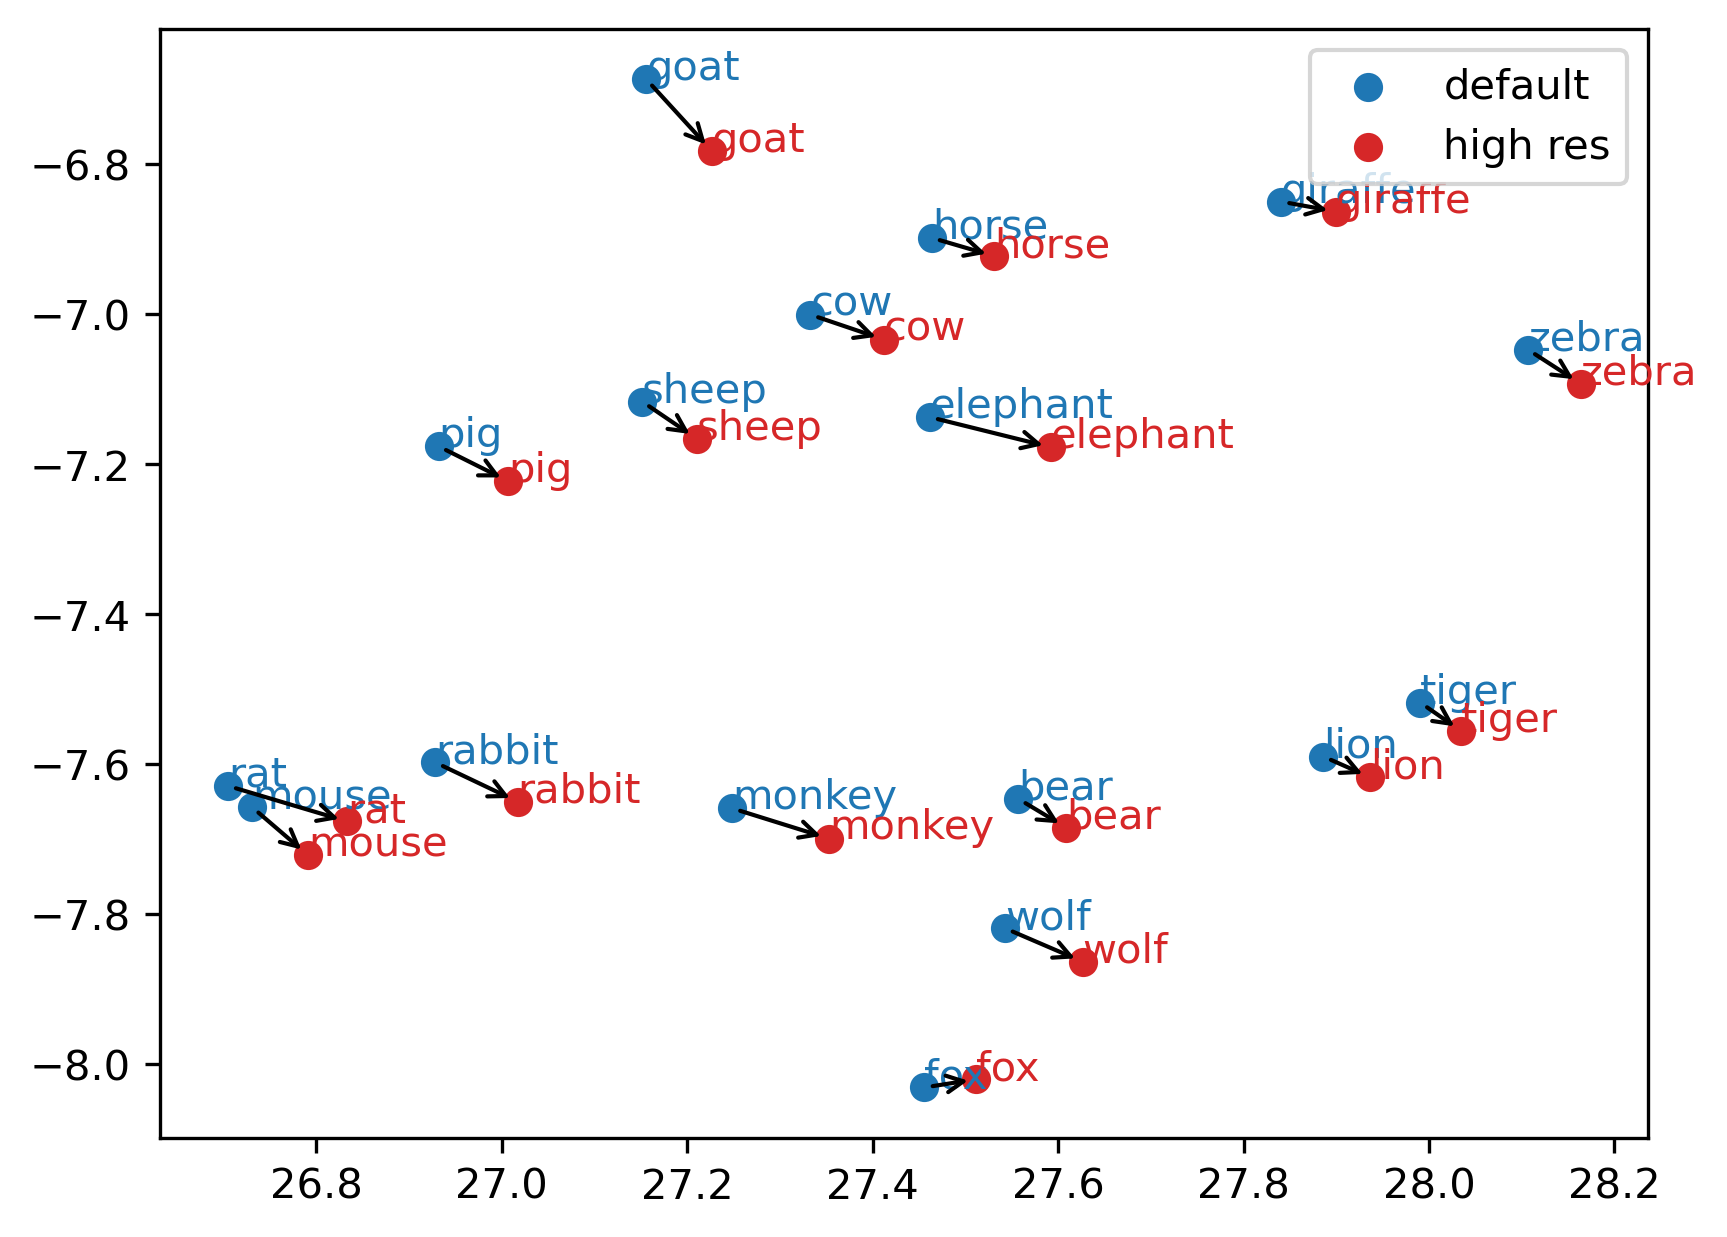

In [187]:

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.dpi'] = 300

plt.scatter(result[0:len(objects), 0], result[0:len(objects), 1], label="default")
plt.scatter(result[len(objects):, 0], result[len(objects):, 1], label="high res", color="tab:red")

for i, obj in enumerate(objects):
    plt.annotate(obj, (result[i, 0], result[i, 1]), color="tab:blue")
    plt.annotate(obj, (result[i+len(objects), 0], result[i+len(objects), 1]), color="tab:red")
    plt.annotate("", 
        (result[i+len(objects), 0], result[i+len(objects), 1]), 
        xytext=(result[i, 0], result[i, 1]), 
        arrowprops=dict(arrowstyle="->")
    )

plt.legend()
plt.show()
